In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
print(sklearn.__version__)
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")

    # Common imports
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

from Pad import Point, Line, Pad, DefaultRewardStrategy
l1 = Line(Point(1.,2.), Point(2.,10.))
l2 = Line(Point(20., 21.), Point(21.,30.))
myPad=Pad(l1, l2, rewardStrategy = DefaultRewardStrategy(),  useRender=True, renderSize=(35,35,3))

myPad.reset()

0.24.1


array([ 1.      ,  2.      ,  2.      , 10.      , 20.      , 21.      ,
       21.      , 30.      , 54.456287], dtype=float32)

In [2]:
keras.backend.clear_session()
n_inputs = 9 # == env.observation_space.shape[0]
dis = 0.9
num_episodes = 100

routePolicyNet = keras.models.Sequential([
    keras.layers.Dense(10, activation="elu", input_shape=[n_inputs], kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
    keras.layers.Dense(20, activation="elu", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
#    keras.layers.Dense(10, activation="elu", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
#     keras.layers.Dense(2, activation="tanh", kernel_initializer=keras.initializers.he_normal()),
    keras.layers.Dense(2, activation="elu", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)),
])

routePolicyNet.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [ ]:
for i in range(num_episodes):
    e = 1. / ((i /10) + 1)
    step_count = 0
    state = myPad.reset()
    done = False
    
    while not done:
        step_count += 1
        x = np.reshape(state, [1, n_inputs])
        Qs = routePolicyNet.predict(x)
        if np.random.rand(1) < e:
            actionidx = np.random.randint(2)
            action = np.zeros(2)
            action[actionidx] = 1
        else:
            pass
        
        state1, reward, done, _  = myPad.step(action[0],action[1],0)
        if done:
            Qs[0, action] = -10000
        else:
            x1 = np.reshape( state1, [1, n_inputs])
            Qs1 = routePolicyNet.predict(x1)
            print(action)
            action = np.argmax(Qs)
            print(action)
            Qs[0, action] = reward + dis * np.max(Qs1)
            
        routePolicyNet.fit(x, Qs)
        state = state1
        
    rList.append(step_count)
    print("episode: {} steps: {}".format(i, step_count))
    if len(rList) > 10 and np.mean(rList[-10:]) > 500:
        break
        
    print("done")

[0. 1.]
1
1/1 [==============================] - 0s 455ms/step - loss: 1.4832e-10 - accuracy: 1.0000
[0. 1.]
0
1/1 [==============================] - 0s 6ms/step - loss: 1.0371e-09 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 6ms/step - loss: 5.4401e-08 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 6ms/step - loss: 1.4371e-07 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 7ms/step - loss: 0.3720 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 6ms/step - loss: 1.8940e-06 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.3530 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.3640 - accuracy: 1.0000
[0. 1.]
1
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.1849 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 13ms/step - loss: 0.0286 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 5ms/step - loss: 0.1691 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.1477 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 10ms/step - loss: 0.0299 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 6ms/step - loss: 0.1578 - accuracy: 1.0000
[1. 0.]
1
1/1 [==============================] - 0s 7ms/step - loss: 0.1586 - accuracy: 1.0000
[0. 1.]
1
1/1 [==============================] - 0s 6ms/s

In [9]:
Q = np.zeros([9,2]) #env.observation_space.n, env.action_space.n

# Learning Rate
learning_rate = 0.85

# discount factor
dis = .99
    
# learning 횟수
num_episodes = 2000

# 학습 시 reward 저장
rList = []

In [38]:
            actionidx = np.random.randint(2)
            action = np.zeros(2)
            action[actionidx] = 1

In [39]:
action

array([0., 1.])

0

In [9]:
n_inputs = 9 
n_outputs = 3 
class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.sigmoid(128, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = torch.sigmoid(x,)
        return x
      
    def sample_action(self, obs, epsilon):
        #print(obs) = -0.0481574  -0.01305691  0.02294851 -0.04412257
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1),random.randint(0,1),random.randint(0,1)
        else : 
            return (out>0.5).numpy() * 1

In [10]:
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out
        max_q_prime = q_targeㄴt(s_prime)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [12]:
def main():
    env = myPad
    q = Qnet()
    q_target = Qnet()
    q_target.load_state_dict(q.state_dict())
    memory = ReplayBuffer()

    print_interval = 20
    score = 0.0  
    optimizer = optim.Adam(q.parameters(), lr=learning_rate)

    for n_epi in range(10000):
        epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
        s = env.reset()
        print(s)
        done = False

        while not done:
            a = q.sample_action(torch.from_numpy(s).float(), epsilon)
            print(a)
            s_prime, r, done, info = env.step(a)
            done_mask = 0.0 if done else 1.0
            memory.put((s,a,r/100.0,s_prime, done_mask))
            s = s_prime

            score += r
            if done:
                break
            
        if memory.size()>2000:
            train(q, q_target, memory, optimizer)

        if n_epi%print_interval==0 and n_epi!=0:
            q_target.load_state_dict(q.state_dict())
            print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                            n_epi, score/print_interval, memory.size(), epsilon*100))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()

[ 1.        2.        2.       10.       20.       21.       21.
 30.       54.456287]
tensor([ 1.0000,  2.0000,  2.0000, 10.0000, 20.0000, 21.0000, 21.0000, 30.0000,
        54.4563])
tensor([ True,  True,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True, False, False,  True,  True,  True,  True, False,  True,
         True, False, False,  True, False, False,  True,  True, False, False,
         True,  True, False,  True, False, False,  True,  True, False,  True,
         True, False, False,  True, False,  True, False, False, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True, False,
        False,  True, False,  True,  True, False,  True,  True, False, False,
        False,  True,  True,  True,  True, False, False, False,  True,  True,
        False,  True, False, False,  True, False,  True,  True,  True, False,
         True, False, False, False, False,  True,  True, False,  True, False,
         True,  True,  True,  True,

TypeError: step() missing 2 required positional arguments: 'extension1pixel' and 'changeDirection'

In [3]:
class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        # Linear 입력의 연결 숫자는 conv2d 계층의 출력과 입력 이미지의 크기에
        # 따라 결정되기 때문에 따로 계산을 해야합니다.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    # 최적화 중에 다음 행동을 결정하기 위해서 하나의 요소 또는 배치를 이용해 호촐됩니다.
    # ([[left0exp,right0exp]...]) 를 반환합니다.
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

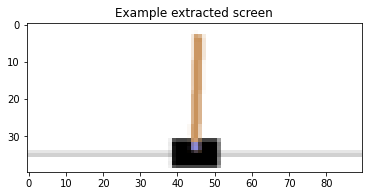

In [4]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])


def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART

def get_screen():
    # gym이 요청한 화면은 400x600x3 이지만, 가끔 800x1200x3 처럼 큰 경우가 있습니다.
    # 이것을 Torch order (CHW)로 변환한다.
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    # 카트는 아래쪽에 있으므로 화면의 상단과 하단을 제거하십시오.
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # 카트를 중심으로 정사각형 이미지가 되도록 가장자리를 제거하십시오.
    screen = screen[:, :, slice_range]
    # float 으로 변환하고,  rescale 하고, torch tensor 로 변환하십시오.
    # (이것은 복사를 필요로하지 않습니다)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # 크기를 수정하고 배치 차원(BCHW)을 추가하십시오.
    return resize(screen).unsqueeze(0).to(device)


env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

In [5]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# AI gym에서 반환된 형태를 기반으로 계층을 초기화 하도록 화면의 크기를
# 가져옵니다. 이 시점에 일반적으로 3x40x90 에 가깝습니다.
# 이 크기는 get_screen()에서 고정, 축소된 렌더 버퍼의 결과입니다.
init_screen = get_screen()
_, _, screen_height, screen_width = init_screen.shape

# gym 행동 공간에서 행동의 숫자를 얻습니다.
n_actions = env.action_space.n

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max (1)은 각 행의 가장 큰 열 값을 반환합니다.
            # 최대 결과의 두번째 열은 최대 요소의 주소값이므로,
            # 기대 보상이 더 큰 행동을 선택할 수 있습니다.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # 100개의 에피소드 평균을 가져 와서 도표 그리기
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # 도표가 업데이트되도록 잠시 멈춤
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [6]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). 이것은 batch-array의 Transitions을 Transition의 batch-arrays로
    # 전환합니다.
    batch = Transition(*zip(*transitions))

    # 최종이 아닌 상태의 마스크를 계산하고 배치 요소를 연결합니다
    # (최종 상태는 시뮬레이션이 종료 된 이후의 상태)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Q(s_t, a) 계산 - 모델이 Q(s_t)를 계산하고, 취한 행동의 열을 선택합니다.
    # 이들은 policy_net에 따라 각 배치 상태에 대해 선택된 행동입니다.
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # 모든 다음 상태를 위한 V(s_{t+1}) 계산
    # non_final_next_states의 행동들에 대한 기대값은 "이전" target_net을 기반으로 계산됩니다.
    # max(1)[0]으로 최고의 보상을 선택하십시오.
    # 이것은 마스크를 기반으로 병합되어 기대 상태 값을 갖거나 상태가 최종인 경우 0을 갖습니다.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # 기대 Q 값 계산
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Huber 손실 계산
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # 모델 최적화
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

In [7]:
num_episodes = 50
for i_episode in range(num_episodes):
    # 환경과 상태 초기화
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for t in count():
        # 행동 선택과 수행
        action = select_action(state)
        _, reward, done, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # 새로운 상태 관찰
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # 메모리에 변이 저장
        memory.push(state, action, next_state, reward)

        # 다음 상태로 이동
        state = next_state

        # 최적화 한단계 수행(목표 네트워크에서)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    #목표 네트워크 업데이트, 모든 웨이트와 바이어스 복사
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show()

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>